## * The purpose is to try predict the future bike shares.
## * Amaç, gelecekteki bisiklet paylaşımlarını tahmin etmeye çalışmaktır.

----
* "timestamp" - timestamp field for grouping the data (verileri gruplamak için zaman damgası alanı)
* "cnt" - the count of a new bike shares  (yeni bir bisiklet paylaşımlarının sayısı)
* "t1" - real temperature in C  (C cinsinden gerçek sıcaklık)
* "t2" - temperature in C "feels like"  (C'deki sıcaklık "hissediyor")
* "hum" - humidity in percentage  (yüzde olarak nem)
* "windspeed" - wind speed in km/h  (km/h cinsinden rüzgar hızı)
* "weathercode" - category of the weather (hava kategorisi)
* "isholiday" - boolean field - 1 holiday / 0 non holiday (boole alanı - 1 tatil / 0 tatil dışı)
* "isweekend" - boolean field - 1 if the day is weekend  (boole alanı - gün hafta sonu ise 1)
* "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.  (kategori alanı meteorolojik mevsimler: 0-bahar ; 1-yaz; 2-düşmek; 3-kış.)

----
* * "weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

### 1) Introduction

In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("london_merged.csv")

In [61]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [63]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [64]:
#convert timestamp feature to datetime object
data.timestamp = pd.to_datetime(data.timestamp)

#extract datetime features: months, days, hours 
data['month'] = data.timestamp.dt.month 
data['day'] = data.timestamp.dt.day 
data['hour'] = data.timestamp.dt.hour

data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4


In [65]:
#one-hot encode categorical weather & season features 
weather = pd.get_dummies(data.weather_code, prefix='weather')
data = pd.concat([data, weather], axis=1)
data = data.drop('weather_code', axis=1)

season = pd.get_dummies(data.season, prefix='season')
data = pd.concat([data, season], axis=1)
data = data.drop('season', axis=1)

In [66]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,month,day,...,weather_2.0,weather_3.0,weather_4.0,weather_7.0,weather_10.0,weather_26.0,season_0.0,season_1.0,season_2.0,season_3.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,1,4,...,0,1,0,0,0,0,0,0,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,1,4,...,0,0,0,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,1,4,...,0,0,0,0,0,0,0,0,0,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,1,4,...,0,0,0,0,0,0,0,0,0,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,1,4,...,0,0,0,0,0,0,0,0,0,1


### 2) Data Visualization 

In [67]:
#sns.pairplot(data, hue="cnt")
#plt.show()

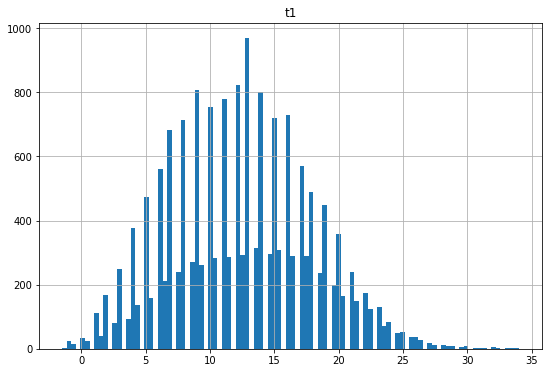

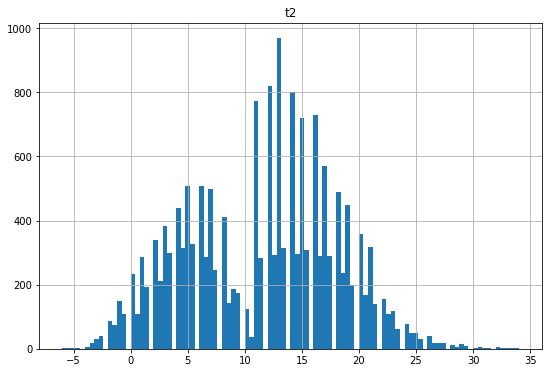

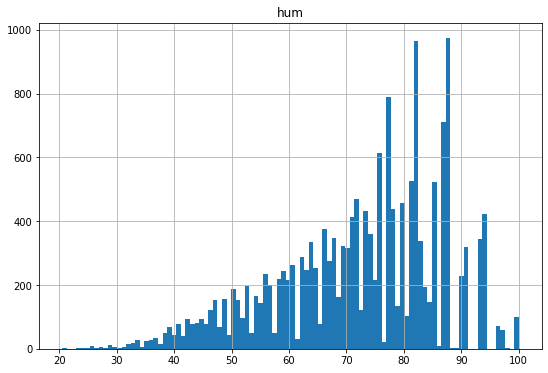

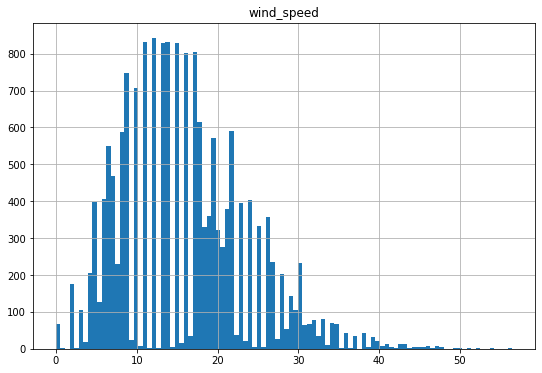

In [68]:
weather_features = ['t1', 't2', 'hum', 'wind_speed']

#plot histogram for numerical features 
for col in weather_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax=ax)
    ax.set_title(col)
plt.show()
    

<AxesSubplot:>

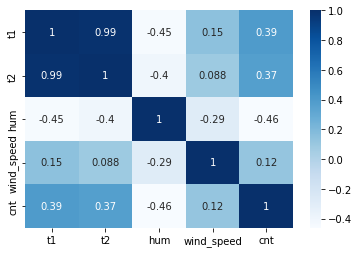

In [69]:
#correlation matrix for weather features
import seaborn as sns 
temp_df = data[weather_features + ['cnt']]
corr_mat = temp_df.corr()

sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap='Blues')

#t1 (actual) and t2 ('feels like') temperatures are highly correlated 
#temperture is positively correlated (~0.39) with rental count
#humidity is negatively correlated with rental count (-0.46). Fewer rentals on high humidity days

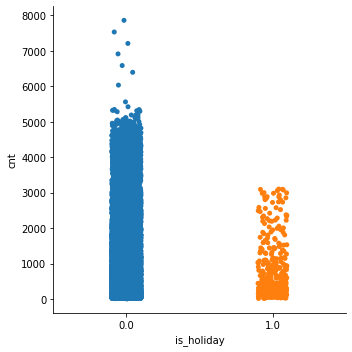

In [70]:
sns.catplot(x="is_holiday", y="cnt", data = data)

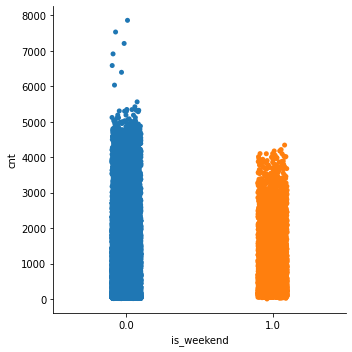

In [71]:
sns.catplot(x="is_weekend", y="cnt", data = data)

### 3) Preprocessing

In [72]:
x = data.drop(['cnt', 'timestamp'], axis=1)
y = data['cnt']

* Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.fit_transform(x_train[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])
x_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']] = scaler.transform(x_test[['t1', 't2', 'hum', 'wind_speed','month','day', 'hour']])

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [75]:
# "is_holiday", "is_weekend", "season"

### 4) Prediction

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

#### 4.1. Linear Regression

In [77]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

y_head_lr = linear_reg.predict(x_test)

#### 4.2. Decision Tree Regression

In [78]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

y_head_tree = tree.predict(x_test)

#### 4.3. Random Forest Regression

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_head_rf = rf.predict(x_test)

#### 4) Conclusion

In [82]:
print("Linear Regression r2 square: {}".format(r2_score(y_test, y_head_lr)))
print("Decision Tree Regression r2 square: {}".format(r2_score(y_test, y_head_tree)))
print("Random Forest Regression r2 square: {}".format(r2_score(y_test, y_head_rf)))

Linear Regression r2 square: 0.31936674038875645
Decision Tree Regression r2 square: 0.9184098375459331
Random Forest Regression r2 square: 0.9539482245111254


* The best of them is Random Forrest.